In [113]:
#Import the libraries
import numpy as np
import pandas as pd

In [114]:
from sklearn.datasets import load_boston,load_iris
EOS_FAM=pd.read_csv('EOS.csv', delimiter=';')

In [157]:
#Limpiando data incompleta
EOS_FAM.replace([np.inf, -np.inf], np.nan)
CEOS=EOS_FAM.dropna(subset=['DIA.', 'AMAX', 'PERIOD'])
#new_EOS_FAM = EOS_FAM.drop('DIA',axis ='columns')
freq3=(24)/(np.array(NFEOS_out['PERIOD']))

In [116]:
FEOS=CEOS[['FAM','NAME','DIA.','AMAX','PERIOD']]
FEOS.describe()

,DIA.,AMAX,PERIOD
count,414.000000,414.000000,414.000000
mean,14.220556,0.435314,22.816185
std,11.636805,0.243009,75.290473
min,1.560000,0.040000,1.330000
25%,5.732500,0.250000,5.278250
50%,10.730000,0.400000,7.408000
75%,19.895000,0.577500,12.088750
max,103.870000,1.800000,975.095000


In [117]:
FEOS.head()

,FAM,NAME,DIA.,AMAX,PERIOD
0,EOS,Eos,103.87,0.12,10.4430
1,EOS,Katharina,24.57,0.21,6.8930
2,EOS,Dorothea,38.25,0.10,5.9740
3,EOS,Brigitta,33.46,0.31,10.7657
4,EOS,Centesima,50.15,0.45,5.2300


In [118]:
NFEOS=FEOS[['DIA.','AMAX','PERIOD']]

In [119]:
NFEOSN=((NFEOS-NFEOS.min())/(NFEOS.max()-NFEOS.min()))

In [120]:
NFEOSN.describe()

,DIA.,AMAX,PERIOD
count,414.000000,414.000000,414.000000
mean,0.123747,0.224610,0.022065
std,0.113741,0.138073,0.077319
min,0.000000,0.000000,0.000000
25%,0.040783,0.119318,0.004055
50%,0.089630,0.204545,0.006242
75%,0.179210,0.305398,0.011049
max,1.000000,1.000000,1.000000


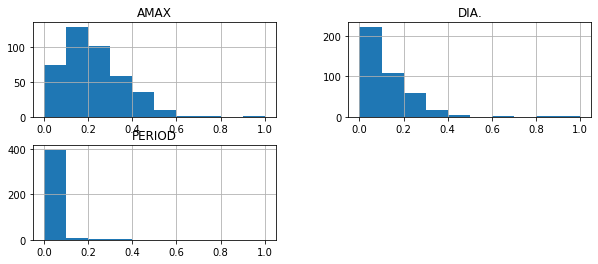

In [121]:
hist1 = ['DIA.', 'AMAX', 'PERIOD']
NFEOSN[hist1].hist(figsize=(10, 4));

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(NFEOS)
unscaled = scaler.inverse_transform(scaled)

In [123]:
scaled #Data normalizada

array([[1.        , 0.04545455, 0.00935852],
       [0.2249047 , 0.09659091, 0.00571288],
       [0.35861597, 0.03409091, 0.00476912],
       ...,
       [0.00215033, 0.28409091, 0.00228905],
       [0.        , 0.44886364, 0.00290625],
       [0.01231551, 0.06818182, 0.        ]])

In [124]:
unscaled.shape #Data no normalizada

(414, 3)

In [125]:
# Creating a 2 dimensional numpy array
data = unscaled
#print(data)
# Creating pandas dataframe from numpy array
dataset = pd.DataFrame({'DIA.': data[:, 0], 'AMAX': data[:, 1], 'PERIOD':data[:,2]})
dataset.head()

,DIA.,AMAX,PERIOD
0,103.87,0.12,10.4430
1,24.57,0.21,6.8930
2,38.25,0.10,5.9740
3,33.46,0.31,10.7657
4,50.15,0.45,5.2300


In [126]:
NFEOS_o = NFEOS
NFEOS.shape


(414, 3)

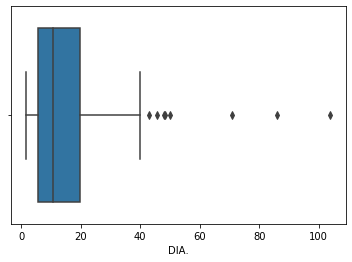

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=NFEOS['DIA.'])

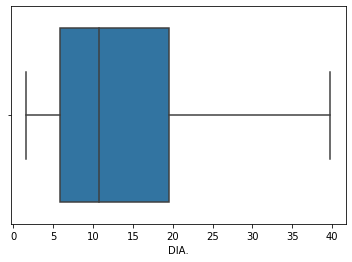

In [128]:
%matplotlib inline
sns.boxplot(x=NFEOS_out['DIA.'])

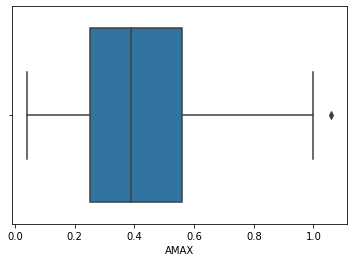

In [129]:
sns.boxplot(x=NFEOS_out['AMAX'])

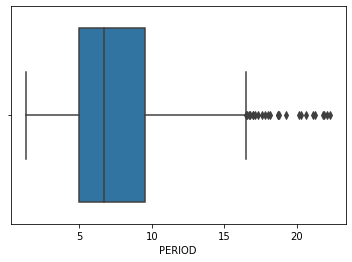

In [130]:
sns.boxplot(x=NFEOS_out['PERIOD'])

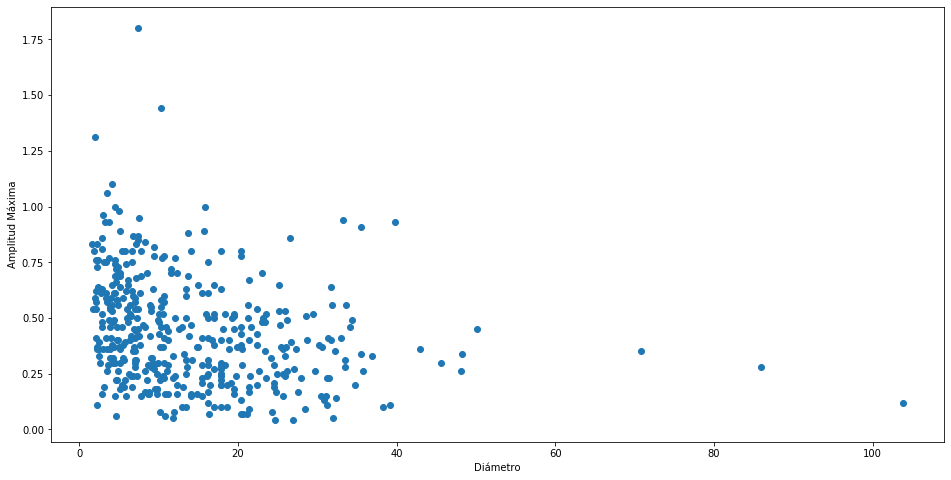

In [131]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(NFEOS['DIA.'], NFEOS['AMAX'])
ax.set_xlabel('Diámetro')
ax.set_ylabel('Amplitud Máxima')
plt.show()

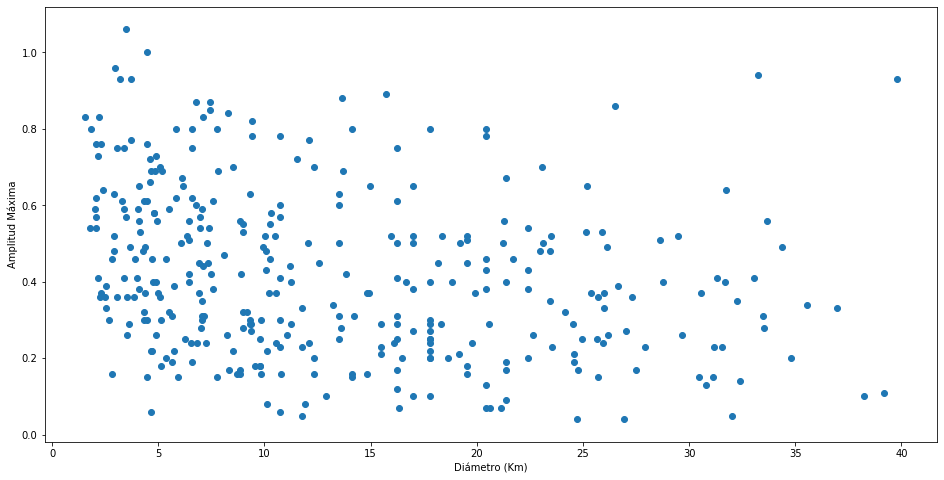

In [132]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(NFEOS_out['DIA.'], NFEOS_out['AMAX'])
ax.set_xlabel('Diámetro (Km)')
ax.set_ylabel('Amplitud Máxima')
plt.show()
fig.savefig('DiaVsAmax.png')


In [133]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(NFEOS))
print(z)

[[7.71327839 1.29910863 0.16453816]
 [0.89044775 0.92830438 0.21174593]
 [2.06745056 1.38150958 0.22396676]
 ...
 [1.07036322 0.43131123 0.25608134]
 [1.08929163 1.62612495 0.24808926]
 [0.98088348 1.13430674 0.2857225 ]]


In [134]:
z.shape

(414, 3)

In [135]:
threshold = 3
print(np.where(z > 3))


(array([  0,   4,   9,  13,  39, 196, 213, 224, 277, 326, 333, 363, 366,
       391, 404], dtype=int64), array([0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1], dtype=int64))


In [136]:
NFEOS_o = NFEOS_o[(z < 3).all(axis=1)]


In [137]:
NFEOS.shape

(414, 3)

In [138]:
NFEOS_o.shape

(399, 3)

In [139]:
NFEOS_o1 = NFEOS


In [140]:
Q1 = NFEOS_o1.quantile(0.25)
Q3 = NFEOS_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NFEOS_out = NFEOS_o1[~((NFEOS_o1 < (Q1 - 1.5 * IQR)) |(NFEOS_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

DIA.      14.1625
AMAX       0.3275
PERIOD     6.8105
dtype: float64


In [141]:
NFEOS_out.shape


(351, 3)

In [142]:
NFEOS_out.describe()

,DIA.,AMAX,PERIOD
count,351.000000,351.000000,351.000000
mean,13.367265,0.419744,7.888536
std,9.058246,0.216864,4.325570
min,1.560000,0.040000,1.330000
25%,5.780000,0.250000,4.952500
50%,10.730000,0.390000,6.722000
75%,19.520000,0.560000,9.562500
max,39.780000,1.060000,22.298000


In [143]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
# Load data and select first column


In [201]:
y=NFEOS_out['AMAX'].values
#DIA.shape
x= np.arange(len(y))
size = len(y)

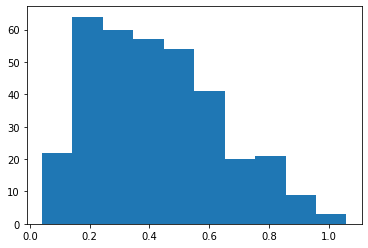

In [202]:
plt.hist(y)
plt.show()

In [203]:
y_df = pd.DataFrame(y, columns=['Data'])
y_df.describe()

,Data
count,351.000000
mean,0.419744
std,0.216864
min,0.040000
25%,0.250000
50%,0.390000
75%,0.560000
max,1.060000


In [204]:
sc=StandardScaler() 
yy = y.reshape (-1,1)
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
y_std
del yy

In [205]:
import warnings
warnings.filterwarnings("ignore")

# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

dist_names = ['beta',
              'maxwell',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution   chi_square  p_value
7        triang    12.134237  0.37949
3         gamma    12.510222  0.45653
6      pearson3    12.510525  0.45652
4       lognorm    17.683817  0.43041
0          beta    19.764563  0.73334
10  weibull_max    24.891722  0.40694
1       maxwell    35.093109  0.11894
5          norm   144.664752  0.02513
8       uniform   624.525090  0.00000
2         expon  1596.892538  0.00000
9   weibull_min  3862.249297  0.00000



Distribution parameters:
------------------------

Distribution: triang
Parameters: (0.20603743285111228, 0.011820236593537144, 1.058927934112726)

Distribution: gamma
Parameters: (4.690274446452535, -0.06399231436824343, 0.10313596393746383)

Distribution: pearson3
Parameters: (0.9235059505609116, 0.41973987768755744, 0.22336123460795781)


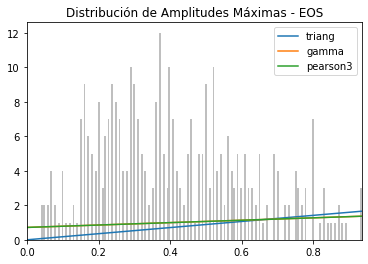

In [206]:
# Divide the observed data into 100 bins for plotting (this can be changed)
number_of_bins = 175
bin_cutoffs = np.linspace(np.percentile(y,0), np.percentile(y,99),number_of_bins)

# Create the plot
h = plt.hist(y, bins = bin_cutoffs, color='0.75')

# Get the top three distributions from the previous phase
number_distributions_to_plot = 3
dist_names = results['Distribution'].iloc[0:number_distributions_to_plot]

# Create an empty list to stroe fitted distribution parameters
parameters = []

# Loop through the distributions ot get line fit and paraemters

for dist_name in dist_names:
    # Set up distribution and store distribution paraemters
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    parameters.append(param)
    
    # Get line for each distribution (and scale to match observed data)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    scale_pdf = np.trapz (h[0], h[1][:-1]) / np.trapz (pdf_fitted, x)
    pdf_fitted *= scale_pdf
    
    # Add the line to the plot
    plt.plot(pdf_fitted, label=dist_name)
    
    # Set the plot x axis to contain 99% of the data
    # This can be removed, but sometimes outlier data makes the plot less clear
    plt.xlim(0,np.percentile(y,99))

# Add legend and display plot

plt.legend()
plt.title('Distribución de Amplitudes Máximas - EOS', loc='center')
#plt.show()
plt.savefig('AmaxDistEOS.png')

# Store distribution paraemters in a dataframe (this could also be saved)
dist_parameters = pd.DataFrame()
dist_parameters['Distribution'] = (
        results['Distribution'].iloc[0:number_distributions_to_plot])
dist_parameters['Distribution parameters'] = parameters

# Print parameter results
print ('\nDistribution parameters:')
print ('------------------------')

for index, row in dist_parameters.iterrows():
    print ('\nDistribution:', row[0])
    print ('Parameters:', row[1] )



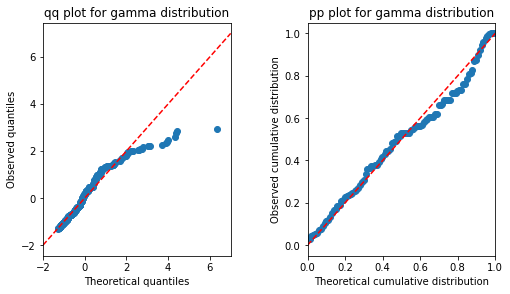

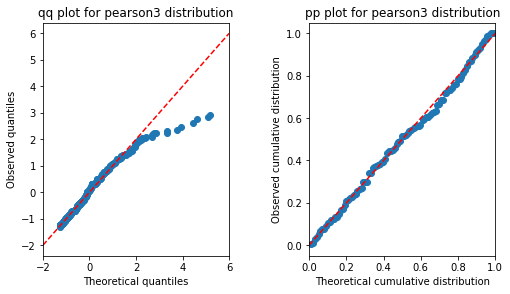

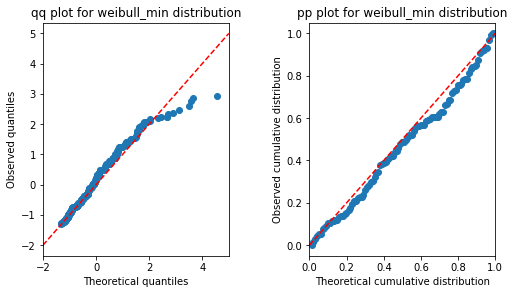

In [191]:
## qq and pp plots
    
data = y_std.copy()
data.sort()

# Loop through selected distributions (as previously selected)

for distribution in dist_names:
    # Set up distribution
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Get random numbers from distribution
    norm = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = size)
    norm.sort()
    
    # Create figure
    fig = plt.figure(figsize=(8,5)) 
    
    # qq plot
    ax1 = fig.add_subplot(121) # Grid of 2x2, this is suplot 1
    ax1.plot(norm,data,"o")
    min_value = np.floor(min(min(norm),min(data)))
    max_value = np.ceil(max(max(norm),max(data)))
    ax1.plot([min_value,max_value],[min_value,max_value],'r--')
    ax1.set_xlim(min_value,max_value)
    ax1.set_xlabel('Theoretical quantiles')
    ax1.set_ylabel('Observed quantiles')
    title = 'qq plot for ' + distribution +' distribution'
    ax1.set_title(title)
    
    # pp plot
    ax2 = fig.add_subplot(122)
    
    # Calculate cumulative distributions
    bins = np.percentile(norm,range(0,101))
    data_counts, bins = np.histogram(data,bins)
    norm_counts, bins = np.histogram(norm,bins)
    cum_data = np.cumsum(data_counts)
    cum_norm = np.cumsum(norm_counts)
    cum_data = cum_data / max(cum_data)
    cum_norm = cum_norm / max(cum_norm)
    
    # plot
    ax2.plot(cum_norm,cum_data,"o")
    min_value = np.floor(min(min(cum_norm),min(cum_data)))
    max_value = np.ceil(max(max(cum_norm),max(cum_data)))
    ax2.plot([min_value,max_value],[min_value,max_value],'r--')
    ax2.set_xlim(min_value,max_value)
    ax2.set_xlabel('Theoretical cumulative distribution')
    ax2.set_ylabel('Observed cumulative distribution')
    title = 'pp plot for ' + distribution +' distribution'
    ax2.set_title(title)
    
    # Display plot    
    plt.tight_layout(pad=4)
    plt.show()
    fig.savefig('frequencyEOS')

True

numpy.ndarray